In [ ]:
#importing necessary libraries
!pip install snscrape
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import tweepy
import configparser
import nltk
import numpy as np
import matplotlib.pyplot as plt
import re

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Obtaining twitter data:

In [ ]:
query = "#tesla OR #teslastocks OR tesla.nasdaq"   #tags realted to which we need our tweets
tweets =[]
public_tweets =  enumerate(sntwitter.TwitterSearchScraper(query).get_items())
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame()
data = []

for i, tweet in public_tweets:
     if(i>2000):

       break
     else:
      score = SentimentIntensityAnalyzer().polarity_scores(tweet.content)
      if(score['neg'] ==0 and score['pos']==0):
        tweet.sentiment= 0
        data.append([tweet.date, tweet.content,tweet.sentiment,score['neg'],score['pos']])
      elif(score['neg']>score['pos']):
       tweet.sentiment = -1
       data.append([tweet.date, tweet.content,tweet.sentiment,score['neg'],score['pos']])
      else:
        tweet.sentiment = 1
        data.append([tweet.date, tweet.content,tweet.sentiment,score['neg'],score['pos']])
df = pd.DataFrame(data,columns=['date','Text','Sentiment','Negative score','Positive score'])

In [ ]:
df

,date,Text,Sentiment,Negative score,Positive score
0,2022-12-31 09:12:38+00:00,Tesla Creative Minimalist Powerpoint Presentat...,1,0.000,0.162
1,2022-12-31 09:12:13+00:00,J’aimerais que @elonmusk nous présente les mis...,0,0.000,0.000
2,2022-12-31 09:11:11+00:00,"#Google , #Apple , #Amazon , #META , #Tesla .....",0,0.000,0.000
3,2022-12-31 09:09:29+00:00,#Elektroautos \n#Elektromobilität\n\n#Tesla -F...,0,0.000,0.000
4,2022-12-31 09:04:59+00:00,Yeah! Someone just spotted a yet unrecognizabl...,1,0.000,0.128
...,...,...,...,...,...
1996,2022-12-30 05:05:27+00:00,(Le Temps): Entre des ventes incertaines et un...,0,0.000,0.000
1997,2022-12-30 05:01:32+00:00,He doesn’t drive a #Tesla https://t.co/PSDsPT1KVs,0,0.000,0.000
1998,2022-12-30 05:00:16+00:00,If You Invested $5000 in these Stocks 10 Years...,0,0.000,0.000
1999,2022-12-30 04:59:49+00:00,"Tesla crashes 72%, wipes out $720 billion mcap...",-1,0.124,0.000


Visualising the sentiment:

In [ ]:
import plotly.express as px
fig = px.pie(df, names='Sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


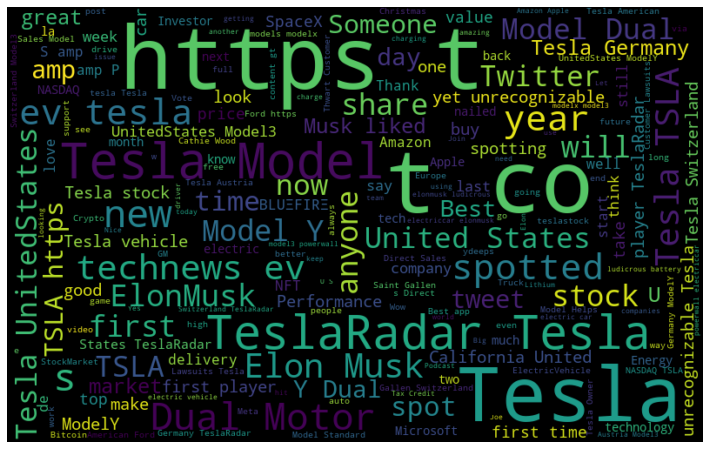

In [ ]:
#most common words appearing in tweets with a positive sentiment
allwords = " ".join([sentence for sentence in df['Text'][df['Sentiment']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

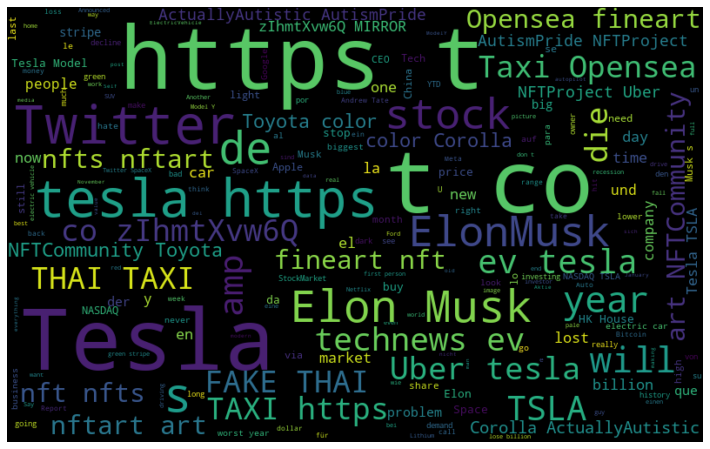

In [ ]:
#most common words appearing in tweets with a negative sentiment
allwords = " ".join([sentence for sentence in df['Text'][df['Sentiment']==-1]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NLP:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def tweet_to_words(tweet):
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    
    return words

print("\nOriginal tweet ->", df['Text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['Text'][0]))


Original tweet -> Tesla Creative Minimalist Powerpoint Presentation https://t.co/oFVoetgTmU #powerpoint #presentation #minimalist #graphicdesign #tesla #graphic #design #marketing #creative #business

Processed tweet -> ['tesla', 'creativ', 'minimalist', 'powerpoint', 'present', 'http', 'co', 'ofvoetgtmu', 'powerpoint', 'present', 'minimalist', 'graphicdesign', 'tesla', 'graphic', 'design', 'market', 'creativ', 'busi']


In [ ]:
X = list(map(tweet_to_words, df['Text']))

In [ ]:
y = pd.get_dummies(df['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vocabulary_size = 5000
count_vector = CountVectorizer(max_features=vocabulary_size,
                              
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
X_train = count_vector.fit_transform(X_train).toarray()


X_test = count_vector.transform(X_test).toarray()



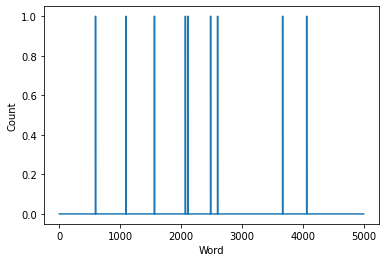

In [ ]:
#Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    
    return X, tokenizer

print('Before Tokenization & Padding \n', df['Text'][0])
X, tokenizer = tokenize_pad_sequences(df['Text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Tesla Creative Minimalist Powerpoint Presentation https://t.co/oFVoetgTmU #powerpoint #presentation #minimalist #graphicdesign #tesla #graphic #design #marketing #creative #business
After Tokenization & Padding 
 [   1 1755 2399 2400 1756    4    2    3 3852 2400 1756 2399 1757    1
 2401  816  393 1755  170    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
y = pd.get_dummies(df['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (1200, 50) (1200, 3)
Validation Set -> (400, 50) (400, 3)
Test Set -> (401, 50) (401, 3)


Sentiment Analysis using RNN:

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=30
learningrate = 0.1
decay_rate = learningrate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learningrate, momentum=momentum, decay=decay_rate, nesterov=False)

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Bidirectional(LSTM(32,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

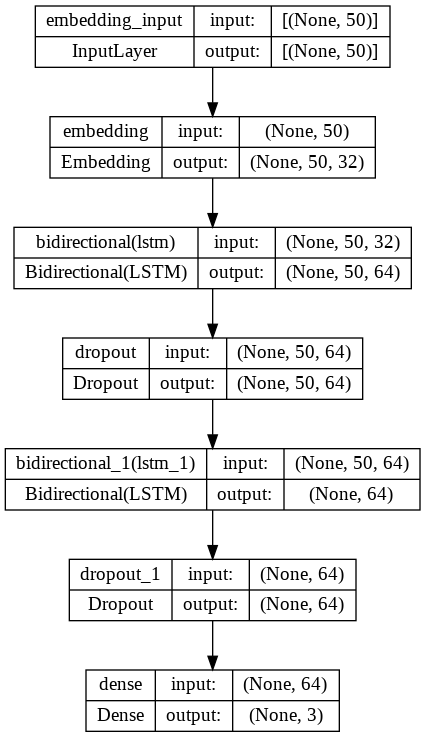

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())


model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])



batch_size =32
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 64)           16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6534
Precision : 0.6904
Recall    : 0.6284
F1 Score  : 0.6580


In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    

13/13 [==============================] - 2s 20ms/step


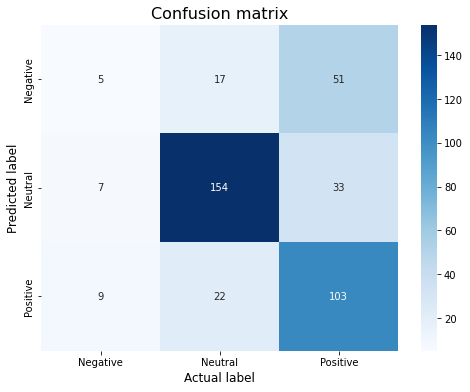

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)


In [ ]:
final, tokenizer = tokenize_pad_sequences(df['Text'])
x = model.predict(final)
y = np.argmax(x , axis = -1)


63/63 [==============================] - 1s 20ms/step


In [ ]:
#obtaining the sentiment predicted by our RNN model
df['pred'] = y-1
df

,date,Text,Sentiment,Negative score,Positive score,pred
0,2022-12-31 09:12:38+00:00,Tesla Creative Minimalist Powerpoint Presentat...,1,0.000,0.162,0
1,2022-12-31 09:12:13+00:00,J’aimerais que @elonmusk nous présente les mis...,0,0.000,0.000,0
2,2022-12-31 09:11:11+00:00,"#Google , #Apple , #Amazon , #META , #Tesla .....",0,0.000,0.000,0
3,2022-12-31 09:09:29+00:00,#Elektroautos \n#Elektromobilität\n\n#Tesla -F...,0,0.000,0.000,0
4,2022-12-31 09:04:59+00:00,Yeah! Someone just spotted a yet unrecognizabl...,1,0.000,0.128,1
...,...,...,...,...,...,...
1996,2022-12-30 05:05:27+00:00,(Le Temps): Entre des ventes incertaines et un...,0,0.000,0.000,0
1997,2022-12-30 05:01:32+00:00,He doesn’t drive a #Tesla https://t.co/PSDsPT1KVs,0,0.000,0.000,0
1998,2022-12-30 05:00:16+00:00,If You Invested $5000 in these Stocks 10 Years...,0,0.000,0.000,0
1999,2022-12-30 04:59:49+00:00,"Tesla crashes 72%, wipes out $720 billion mcap...",-1,0.124,0.000,1


In [ ]:
df['date'] = pd.to_datetime(df.date).dt.tz_localize(None)
df

In [ ]:
#grouping tweets into intervals of 5 mins and obtaining mean sentiment
df1 = df.resample('5T', on='date').pred.mean().to_frame()           
df1.dropna()
df1

,pred
date,
2022-12-30 04:55:00,1.000000
2022-12-30 05:00:00,0.000000
2022-12-30 05:05:00,0.800000
2022-12-30 05:10:00,0.000000
2022-12-30 05:15:00,0.375000
...,...
2022-12-31 08:50:00,0.400000
2022-12-31 08:55:00,0.666667
2022-12-31 09:00:00,0.500000


In [ ]:
!pip install yfinance

In [ ]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

obtaining stock data at interval of 5 mins:

In [ ]:
#Interval required 5 minutes
data = yf.download(tickers='TSLA',period = '1d', interval='5m')
#Print data
type(data)

data['change'] = data['Close'] - data['Open']
data.head(150)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,change
Datetime,,,,,,,
2022-12-30 09:30:00,119.949997,123.000000,119.750000,122.482101,122.482101,11248862,2.532104
2022-12-30 09:35:00,122.489998,123.720001,121.940002,123.320000,123.320000,4905259,0.830002
2022-12-30 09:40:00,123.309998,124.399002,122.400002,124.154999,124.154999,5178419,0.845001
2022-12-30 09:45:00,124.130096,124.480003,121.919998,122.650002,122.650002,5687075,-1.480095
2022-12-30 09:50:00,122.660004,122.959999,121.629997,122.124901,122.124901,3937051,-0.535103
...,...,...,...,...,...,...,...
2022-12-30 15:40:00,122.410004,122.730003,122.309998,122.660004,122.660004,1538733,0.250000
2022-12-30 15:45:00,122.660004,123.000000,122.629997,122.849998,122.849998,2384690,0.189995
2022-12-30 15:50:00,122.839996,123.269997,122.809998,123.060799,123.060799,2561450,0.220802


In [ ]:
data1 = data.drop(['Open','Close','High','Low','Adj Close','Volume'],axis= 1)
data1.index.names = ['date']
data1

In [ ]:
df1

,pred
date,
2022-12-30 04:55:00,1.000000
2022-12-30 05:00:00,0.000000
2022-12-30 05:05:00,0.800000
2022-12-30 05:10:00,0.000000
2022-12-30 05:15:00,0.375000
...,...
2022-12-31 08:50:00,0.400000
2022-12-31 08:55:00,0.666667
2022-12-31 09:00:00,0.500000


In [ ]:
#merging the datframes
final_df = pd.merge(df1,data1, on = 'date')
final_df

,pred,change
date,,
2022-12-30 09:30:00,0.166667,2.532104
2022-12-30 09:35:00,0.285714,0.830002
2022-12-30 09:40:00,0.400000,0.845001
2022-12-30 09:45:00,0.666667,-1.480095
2022-12-30 09:50:00,0.333333,-0.535103
...,...,...
2022-12-30 15:40:00,0.500000,0.250000
2022-12-30 15:45:00,0.307692,0.189995
2022-12-30 15:50:00,0.250000,0.220802


visulaising relation between change in sentiment and stock price movement:

(array([738519.41666667, 738519.45833333, 738519.5       , 738519.54166667,
        738519.58333333, 738519.625     , 738519.66666667]),
 <a list of 7 Text major ticklabel objects>)

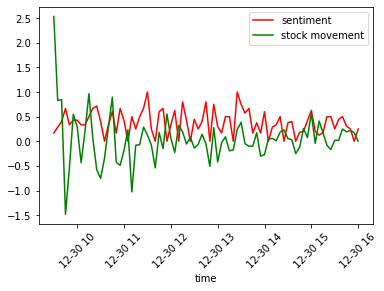

In [ ]:
plt.plot(final_df['pred'], color = 'r' , label = 'sentiment')
plt.plot(final_df['change'] , color = 'g' , label = 'stock movement')
plt.xlabel('time')
plt.legend()
plt.xticks(rotation = 45)

Generally an upward trend in general sentiment indicates a rise in stock price however there are quite a few discripancies due to the use of an interval of merely 5 mins rather than a longer interval of time.

Sentiment Analysis using Naive Bayes:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2 ,y_test2 = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [ ]:
#naive bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train2, y_train2)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)




MultinomialNB()

In [ ]:
#accuracy score
clf.score(X_train2,y_train2)
y_pred = clf.predict(X_test2)
clf.score(X_test2, y_test2)

0.6483790523690773

In [ ]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 28  14  35]
 [ 13 122  56]
 [  5  18 110]]
Normalized confusion matrix
[[0.36 0.18 0.45]
 [0.07 0.64 0.29]
 [0.04 0.14 0.83]]


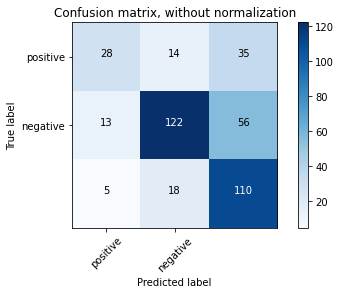

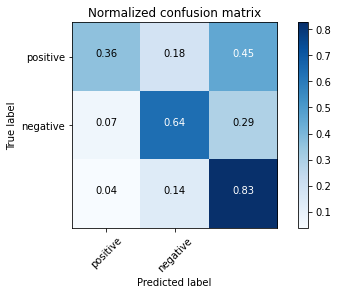

In [ ]:
cnf_matrix = confusion_matrix(y_test2, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
#obtaining the predicted sentiment bynaive bayes classifier
y1= clf.predict(X)
df['nb'] = y1
df

,date,Text,Sentiment,Negative score,Positive score,pred,nb
0,2022-12-31 09:12:38,Tesla Creative Minimalist Powerpoint Presentat...,1,0.000,0.162,0,1
1,2022-12-31 09:12:13,J’aimerais que @elonmusk nous présente les mis...,0,0.000,0.000,0,0
2,2022-12-31 09:11:11,"#Google , #Apple , #Amazon , #META , #Tesla .....",0,0.000,0.000,0,0
3,2022-12-31 09:09:29,#Elektroautos \n#Elektromobilität\n\n#Tesla -F...,0,0.000,0.000,0,0
4,2022-12-31 09:04:59,Yeah! Someone just spotted a yet unrecognizabl...,1,0.000,0.128,1,1
...,...,...,...,...,...,...,...
1996,2022-12-30 05:05:27,(Le Temps): Entre des ventes incertaines et un...,0,0.000,0.000,0,0
1997,2022-12-30 05:01:32,He doesn’t drive a #Tesla https://t.co/PSDsPT1KVs,0,0.000,0.000,0,0
1998,2022-12-30 05:00:16,If You Invested $5000 in these Stocks 10 Years...,0,0.000,0.000,0,1
1999,2022-12-30 04:59:49,"Tesla crashes 72%, wipes out $720 billion mcap...",-1,0.124,0.000,1,-1


In [ ]:
#grouping into interval of 5 mins
df2 = df.resample('5T', on='date').nb.mean().to_frame()           
df2.dropna()
df2

,nb
date,
2022-12-30 04:55:00,0.000000
2022-12-30 05:00:00,0.500000
2022-12-30 05:05:00,-0.200000
2022-12-30 05:10:00,0.000000
2022-12-30 05:15:00,0.500000
...,...
2022-12-31 08:50:00,0.400000
2022-12-31 08:55:00,0.000000
2022-12-31 09:00:00,0.166667


In [ ]:
final_df2 = pd.merge(df2,data1, on = 'date')
final_df2

,nb,change
date,,
2022-12-30 09:30:00,-0.166667,2.532104
2022-12-30 09:35:00,0.000000,0.830002
2022-12-30 09:40:00,0.200000,0.845001
2022-12-30 09:45:00,0.000000,-1.480095
2022-12-30 09:50:00,0.666667,-0.535103
...,...,...
2022-12-30 15:40:00,0.375000,0.250000
2022-12-30 15:45:00,-0.076923,0.189995
2022-12-30 15:50:00,0.250000,0.220802


(array([738519.42, 738519.46, 738519.5 , 738519.54, 738519.58, 738519.62,
        738519.67]), <a list of 7 Text major ticklabel objects>)

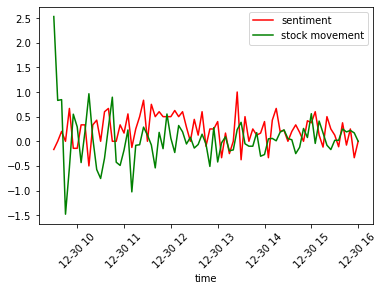

In [ ]:
plt.plot(final_df2['nb'], color = 'r' , label = 'sentiment')
plt.plot(final_df2['change'] , color = 'g' , label = 'stock movement')
plt.xlabel('time')
plt.legend()
plt.xticks(rotation = 45)

The naive Bayes Classifier also gives similar results as stated on using the RNN with a few more discrepancies again due to the small time interval used

To get better results we shall perform day wise analysis next